# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Revalina Aryanti
- **Email:** revarevalinaaryanti@gmail.com
- **ID Dicoding:** MS153D5X0632

## Menentukan Pertanyaan Bisnis

Berikut pertanyaan bisnis yang saya tentukan untuk analisis Bike Sharing Dataset:

1. Bagaimana perbandingan Penggunaan Sepeda pada Hari Libur dan Tidak Libur?
2. Bagaimana pola penggunaan sepeda pada hari-hari tertentu?
3. Bagaimana pola penggunaan sepeda pada musim-musim tertentu?
4. Waktu (jam) dengan peminjaman tertinggi berdasarkan jam?
5. Bagaimana segmentasi peminjaman menggunakan RFM Analysis?

## Import Semua Packages/Library yang Digunakan

In [6]:
import streamlit as st 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/pawcatReva/dicoding/refs/heads/main/day.csv")
day_df.head()
hour_df = pd.read_csv("https://raw.githubusercontent.com/pawcatReva/dicoding/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset diambil dari URL GitHub, yang memungkinkan penggunaan data secara langsung tanpa perlu mengunduhnya terlebih dahulu.
- Dataset terdiri dari dua file utama: Day.csv dan Hour.csv.

### Assessing Data

In [3]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- untuk melihat info dari data set day dan hour.

In [8]:
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- untuk melihat apakah ada missing value atau tidak.

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- untuk melihat apakah ada duplikasi atau tidak pada data set.

In [10]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari sini kita bisa melihat rata-rata (mean), median (50%), nilai maksimal (max), dan nilai minimal (min) untuk masing-masing variabel.

In [11]:
print(hour_df[(hour_df['instant'] > 100) | (hour_df['instant'] < -100)])
print(day_df[(day_df['instant'] > 100) | (day_df['instant'] < -100)])

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
100        101  2011-01-05       1   0     1   9        0        3   
101        102  2011-01-05       1   0     1  10        0        3   
102        103  2011-01-05       1   0     1  11        0        3   
103        104  2011-01-05       1   0     1  12        0        3   
104        105  2011-01-05       1   0     1  13        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
100             1           1  0.22  0.1970  0.37     0.3284       6   
101            

**Insight:**
- untuk menyaring data, tujuannya untuk mencari outler dan memverifikasi data. Kalau tidak ada hasil yang muncul, berarti tidak ada data yang memenuhi kondisi ini (tidak ada instant di luar rentang), contoh disini yaitu mencari dari kolom 'instant'.

In [12]:
day_df.describe(include="all")
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- untuk melihat ringkasan data numerik dan non numerik.

In [13]:
print("Min & Max atemp:", day_df["atemp"].min(), "-", day_df["atemp"].max())
print("Min & Max atemp:", day_df["atemp"].min(), "-", day_df["atemp"].max())

Min & Max atemp: 0.0790696 - 0.840896
Min & Max atemp: 0.0790696 - 0.840896


**Insight:**
- untuk mencari tahu minimal dan maksimal yang ada di suatu kolom.

In [14]:
inaccurate_data = day_df[day_df['yr'] != day_df['yr'].round()]
print(inaccurate_data)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- untuk mencari innacurate value/kesalahan dalam menginput data di suatu kolom di dataset.

### Cleaning Data

In [ ]:
day_df["temp_real"] = day_df["temp"] * 41
day_df["atemp_real"] = day_df["atemp"] * 50
day_df["hum_real"] = day_df["hum"] * 100
day_df["windspeed_real"] = day_df["windspeed"] * 67

**Insight:**
- Ini agar data awal dalam skala 0-1, perlu dikonversi ke skala aslinya agar lebih mudah dipahami.
- Mungkgin ini tidak terlalu masuk untuk Cleaning data. Tapi, saya sudah menganalisis dataset ini tidak ada missing value, innacurate value, duplikat data, dan oulier.

In [ ]:
Q1 = hour_df["temp"].quantile(0.25)
Q3 = hour_df["temp"].quantile(0.75)
IQR = Q3 - Q1
outlier_temp = hour_df["temp"][(hour_df["temp"] < (Q1 - 1.5 * IQR)) | (hour_df["temp"] > (Q3 + 1.5 * IQR))]

# Menghapus outlier pada kolom "temp"
hour_df = hour_df.drop(outlier_temp.index)

Q1 = day_df["temp"].quantile(0.25)
Q3 = day_df["temp"].quantile(0.75)
IQR = Q3 - Q1
outlier_temp = day_df["temp"][(day_df["temp"] < (Q1 - 1.5 * IQR)) | (day_df["temp"] > (Q3 + 1.5 * IQR))]

# Menghapus outlier pada kolom "temp"
day_df = day_df.drop(outlier_temp.index)

- Ini untuk membersihkan outlier meskipun tidak ada.

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita bisa melihat kolom apa saja yang tersedia dalam dataset.

In [16]:
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Jika ada nilai yang hilang, kita harus memutuskan apakah akan menghapus atau mengisinya dengan nilai lain.

In [17]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari sini kita bisa melihat rata-rata (mean), median (50%), nilai maksimal (max), dan nilai minimal (min) untuk masing-masing variabel.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan Penggunaan Sepeda pada Hari Libur dan Tidak Libur?

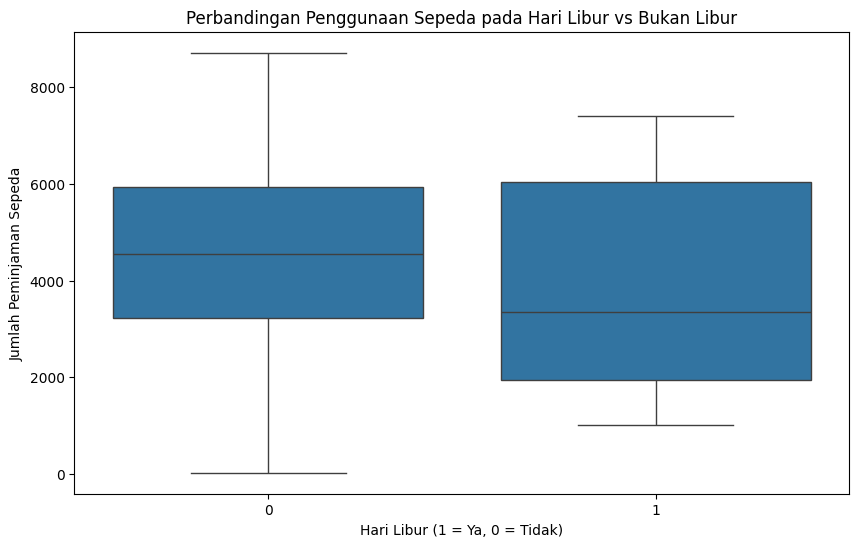

In [21]:
%matplotlib inline 
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.title('Perbandingan Penggunaan Sepeda pada Hari Libur vs Bukan Libur')
plt.xlabel('Hari Libur (1 = Ya, 0 = Tidak)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Penggunaan sepeda cenderung lebih rendah pada hari libur, kemungkinan karena banyak orang tidak bepergian ke kantor/sekolah.
- Sedangkan data menunjukkan data lebih meningkat di hari kerja/biasa dikarenakan aktivitas berjalan di hari kerja/hari biasa.

### Pertanyaan 2: - Bagaimana pola penggunaan sepeda pada hari-hari tertentu?

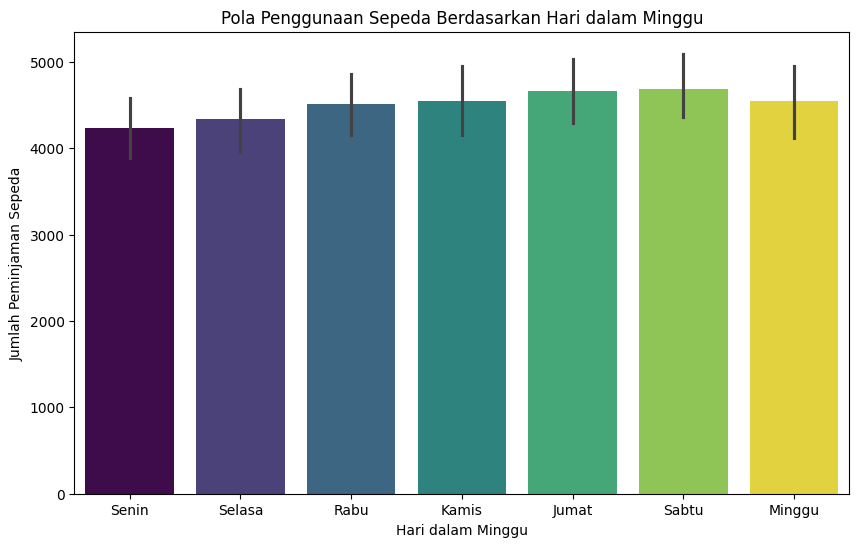

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='cnt', hue='weekday', data=day_df, palette='viridis', legend=False)
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Insight:**
- Penggunaan sepeda lebih tinggi pada hari kerja, kemungkinan besar karena digunakan sebagai transportasi harian saat pergi bekerja/aktivitas.
- Akhir pekan menunjukkan penurunan, bisa jadi karena banyak orang lebih memilih kendaraan pribadi, aktivitas lain atau hanya diam dirumah/tidak kemana-mana.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda pada musim-musim tertentu?

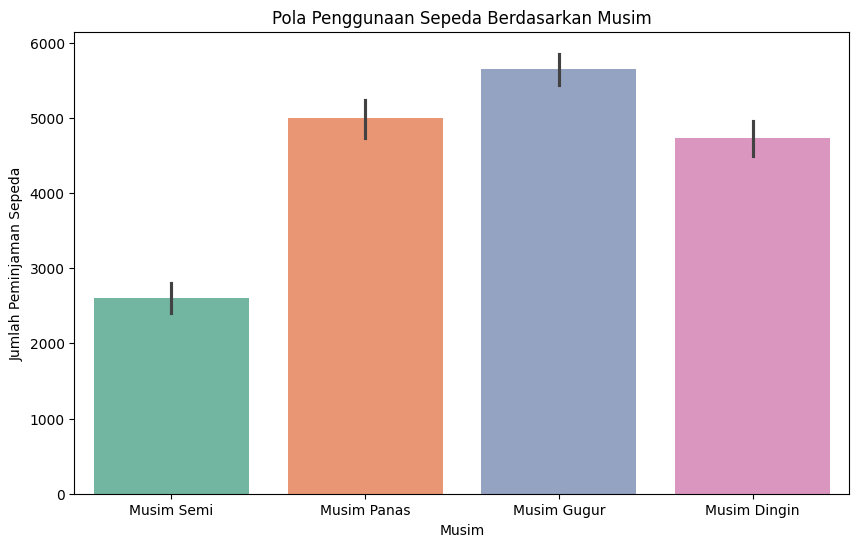

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', hue='season', data=day_df, palette='Set2', legend=False)
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(4), labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

**Insight:**
- Cuaca memiliki pengaruh besar terhadap peminjaman sepeda. Musim panas dan gugur adalah periode puncak penggunaan sepeda.
- Sedangkan musim dingin mengalami penurunan signifikan, dikarenakan suhu cuaca sangat dingin untuk beraktivitas dan jalan tertutup dengan salju (jika turun salju).

### Pertanyaan 4: Waktu (jam) dengan peminjaman tertinggi berdasarkan jam?

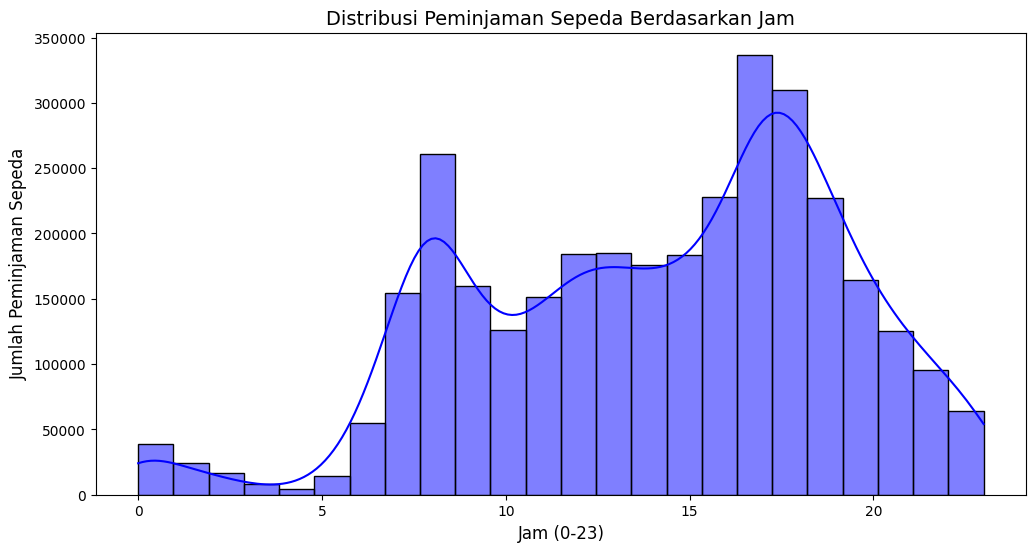

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(hour_df, x='hr', weights='cnt', bins=24, kde=True, color='blue')
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam (0-23)", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.show()

**Insight:**
 - Dari visualisasi histplot distribusi peminjaman sepeda berdasarkan jam (hour_df), terlihat bahwa peminjaman tertinggi terjadi pada jam sibuk (sekitar pagi dan sore hari).
- Puncak peminjaman biasanya terjadi pada jam 07:00 - 09:00 pagi (perjalanan ke kantor/sekolah) dan 17:00 - 19:00 sore (perjalanan pulang kerja).
- Hal ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi harian dibandingkan rekreasi.

### Pertanyaan 5: Bagaimana segmentasi peminjaman menggunakan RFM Analysis?

     Tanggal  Monetary  Frequency  Recency
0 2011-01-01       985          1      730
1 2011-01-02       801          1      729
2 2011-01-03      1349          1      728
3 2011-01-04      1562          1      727
4 2011-01-05      1600          1      726


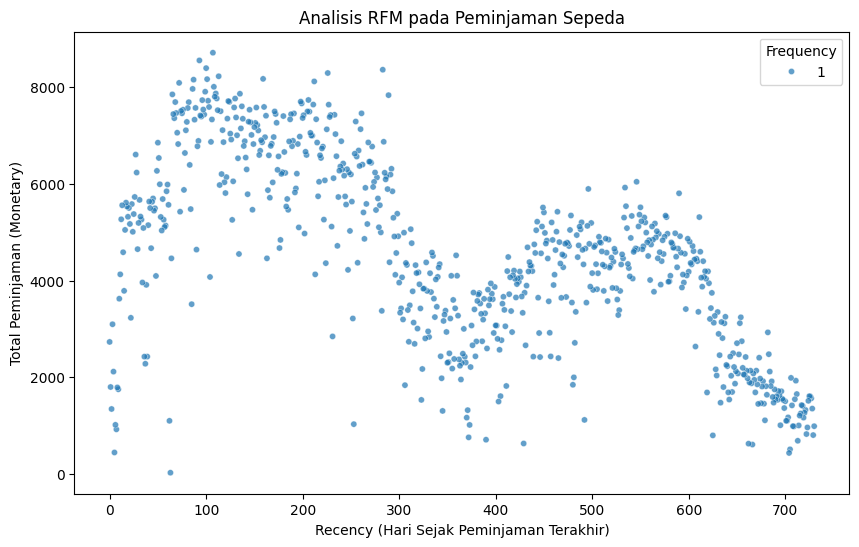

In [25]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
latest_date = day_df['dteday'].max()
# Hitung Recency, Frequency, dan Monetary
rfm_df = day_df.groupby('dteday').agg({
    'cnt': ['sum', 'count']
}).reset_index()

rfm_df.columns = ['Tanggal', 'Monetary', 'Frequency']
rfm_df['Recency'] = (latest_date - rfm_df['Tanggal']).dt.days

print(rfm_df.head())

plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', sizes=(20, 200), data=rfm_df, alpha=0.7)
plt.title("Analisis RFM pada Peminjaman Sepeda")
plt.xlabel("Recency (Hari Sejak Peminjaman Terakhir)")
plt.ylabel("Total Peminjaman (Monetary)")
plt.show()

**Insight:**
1. **Recency (Seberapa Baru Transaksi Terakhir?):** Semakin kecil nilai recency, semakin baru seseorang terakhir kali menggunakan layanan peminjaman sepeda. Banyak pelanggan yang masih aktif menggunakan layanan secara reguler.
2. **Frequency (Seberapa Sering Peminjaman Dilakukan?):** Sebagian besar pengguna hanya meminjam beberapa kali dalam seminggu. Ada kelompok pelanggan dengan frekuensi tinggi, kemungkinan pekerja atau pelanggan tetap.
3. **Monetary (Total Peminjaman yang Dilakukan):** Pengguna dengan monetary tinggi berarti sering menggunakan layanan sepeda dalam jumlah besar. Dari scatterplot, terlihat bahwa pelanggan dengan recency rendah (baru-baru ini meminjam) memiliki monetary yang cukup tinggi.

## Conclusion

- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.
- Hari kerja memiliki tren peminjaman yang lebih tinggi, kemungkinan karena digunakan sebagai alat transportasi harian.
- Musim mempengaruhi jumlah peminjaman sepeda, dengan penggunaan tertinggi pada musim panas/gugur dan terendah pada musim dingin dan saat cuaca ekstrim seperti hujan lebat/badai eminjaman sepeda bisa turun drastis atau tidak ada sama sekali. Orang lebih memilih transportasi yang tertutup seperti mobil, bus dan lainnya, atau orang memilih untuk tetap di rumah.
- Pola peminjaman sepeda meningkat pada jam sibuk (07:00-09:00 & 17:00-19:00) yang menunjukkan penggunaan untuk keperluan kerja.
- Analisis RFM menunjukkan bahwa sebagian besar peminjaman terjadi baru-baru ini, dan ada pola penggunaan berulang dari pengguna reguler.
- RFM Analysis menunjukkan bahwa sebagian besar pengguna masih aktif, tetapi ada segmen yang jarang menggunakan layanan ini, yang bisa menjadi target untuk strategi promosi.